<a href="https://colab.research.google.com/github/alifele/Bioinformatics-OpticalCNNwithFourierOptics/blob/master/Fourier_Sixth_attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.datasets import load_sample_image
from scipy.special import jv
from scipy import signal
from scipy import misc

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [4]:
hW, hH = 600,300
hFreq = 10.5
x = np.linspace( 0, 1, 2*hW)     # columns (Width)
y = np.linspace( 0, 1, 2*hH)     # rows (Height)
[X,Y] = np.meshgrid(x,y)
Sin = np.sin(hFreq * np.pi * 2 * X)
W,H = np.shape(Sin)

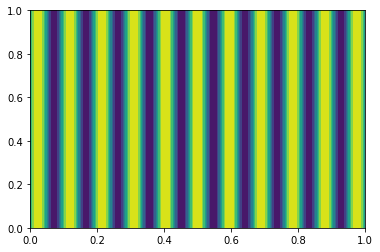

In [5]:
plt.contourf(X,Y,Sin)

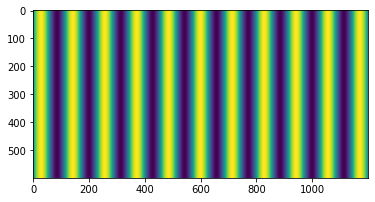

In [6]:
plt.imshow(Sin)

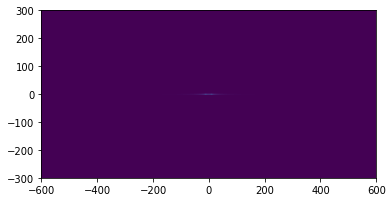

In [7]:
Fourier = np.fft.fft2(Sin)/(W*H)
Fourier = np.fft.fftshift(Fourier)
P = np.log(np.abs(Fourier)+0.001)
plt.imshow(P, extent=[-hW,hW,-hH,hH])

In [70]:
flower = load_sample_image("flower.jpg") / 255
flower = flower[:-1,:]
flower =  rgb2gray(flower)
H, W = flower.shape

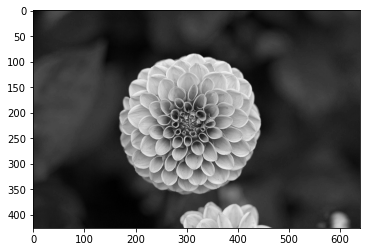

In [76]:
plt.imshow(flower, cmap='gray')
height, width = np.shape(flower)

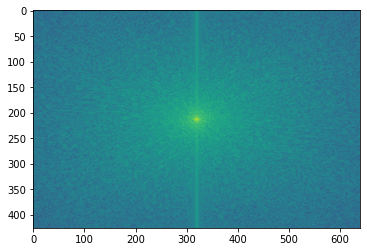

In [77]:
Fourier = np.fft.fft2(flower)
Fourier = np.fft.fftshift(Fourier)
P = np.log(np.abs(Fourier))
plt.imshow(P)


In [378]:
def mask_creator(height, width, r): #heigth, width
  mask = np.zeros((height, width))
  for i in range(height):
    for j in range(width):
      if (j-width/2)**2 + (i-height/2)**2 <r**2:
        mask[i,j] = 1

  return mask

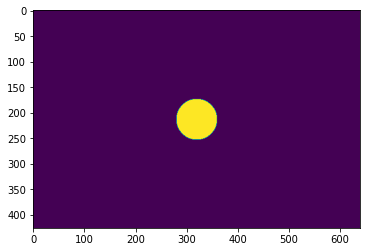

In [466]:
flower_mask = mask_creator(*flower.shape, 40)
plt.imshow(flower_mask)

In [467]:
masked_flower = Fourier * flower_mask

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


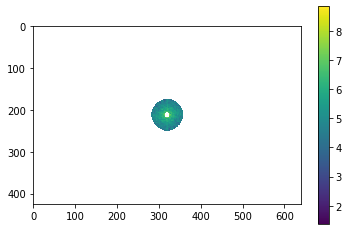

In [468]:
p = np.abs(masked_flower)
plt.imshow(np.log(p))
plt.colorbar()

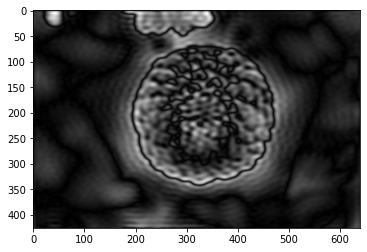

In [469]:
Flower = np.fft.fft2(masked_flower)
plt.imshow(np.abs(Flower), cmap='gray')

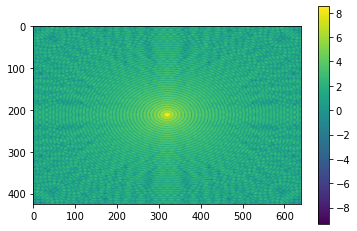

In [470]:
mask_Fourier = np.fft.fft2(flower_mask)
mask_Fourier = np.fft.fftshift(mask_Fourier)
P_mask_Fourier = np.abs(mask_Fourier)
plt.imshow(np.log(P_mask_Fourier))
plt.colorbar()

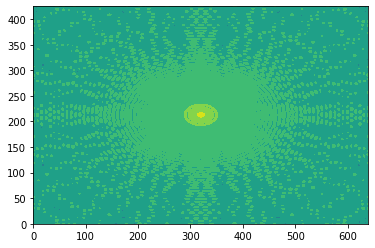

In [471]:
plt.contourf(np.log(P_mask_Fourier))

In [472]:
x = np.arange(-flower.shape[1]/2,-flower.shape[1]/2)
x.shape

(0,)

(0.0, 800.0)

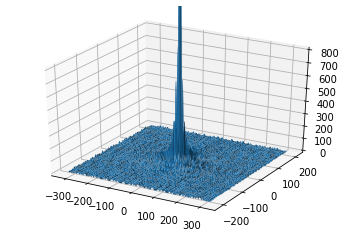

In [485]:
from mpl_toolkits.mplot3d import Axes3D
y = np.arange(-flower.shape[0]/2,flower.shape[0]/2)
x = np.arange(-flower.shape[1]/2,flower.shape[1]/2)
X,Y = np.meshgrid(x,y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,P_mask_Fourier)
ax.set_zlim([0,800])

In [474]:
def mask_fourier_for_conv(a, window_size):
  x = np.linspace(-10,10,100*window_size)
  X,Y = np.meshgrid(x,x)
  J = 2 * np.pi * a**2 * jv(1,a*(np.sqrt(X**2+ Y**2)))/(a*(np.sqrt(X**2+ Y**2)) + 0.0001) 
  return J,X,Y

(-213.0, 213.0)

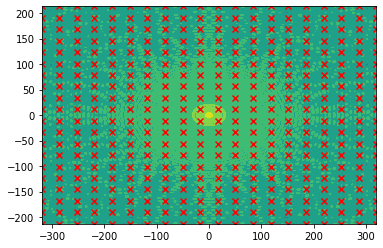

In [475]:
window_size = 20
a = 5
y = np.arange(-flower.shape[0]/2,flower.shape[0]/2)
x = np.arange(-flower.shape[1]/2,flower.shape[1]/2)
X,Y = np.meshgrid(x,y)
x_sample = np.linspace(-width/2,width/2,window_size)
y_sample = np.linspace(-height/2, height/2, window_size)
X_s, Y_s = np.meshgrid(x_sample,y_sample)
plt.contourf(X,Y,np.log(P_mask_Fourier))
plt.scatter(X_s, Y_s, marker='x', c='r')
plt.xlim(-width/2, width/2)
plt.ylim(-height/2, height/2)

In [476]:
x_sampling = x[::height//window_size]
y_sampling = y[::width//window_size]


In [477]:
sampling_indeces_x = (x[:, None] == x_sampling).argmax(axis=0)
sampling_indeces_y = (y[:, None] == y_sampling).argmax(axis=0)

In [478]:
sampling_indeces_x

array([  0,  21,  42,  63,  84, 105, 126, 147, 168, 189, 210, 231, 252,
       273, 294, 315, 336, 357, 378, 399, 420, 441, 462, 483, 504, 525,
       546, 567, 588, 609, 630])

In [479]:
weights = P_mask_Fourier[sampling_indeces_y][:,sampling_indeces_x]

In [480]:
X_sampling, Y_sampling = np.meshgrid(sampling_indeces_x, sampling_indeces_y)

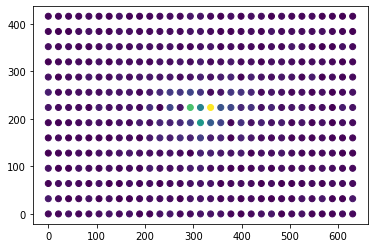

In [481]:
plt.scatter(X_sampling, Y_sampling, c = weights)

In [482]:
grad = signal.convolve2d(flower, weights, boundary='symm', mode='same')

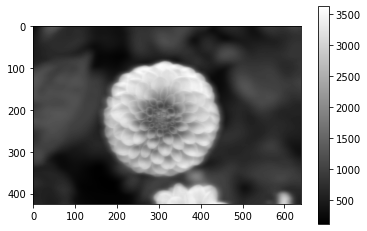

In [483]:
plt.imshow(grad, cmap="gray")
plt.colorbar()

In [484]:
grad

array([[318.30113864, 322.49885036, 328.64403416, ..., 990.42374093,
        987.58444158, 985.86287914],
       [318.14390448, 322.90346913, 329.3168026 , ..., 990.08136075,
        986.94364438, 985.07640793],
       [318.99568121, 323.83284839, 331.25808097, ..., 985.60937211,
        982.84125641, 981.45683966],
       ...,
       [615.97481598, 616.59509826, 616.81936225, ..., 563.48760275,
        561.43936424, 559.99816438],
       [611.6399473 , 612.02584085, 613.12497452, ..., 562.98198424,
        560.55675518, 559.4331989 ],
       [611.06617207, 611.75506848, 612.6887525 , ..., 566.296771  ,
        563.65365952, 562.14384489]])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, J)

In [366]:
np.abs(Flower)

array([[47163.53622652,  5139.02582747,  4528.08398234, ...,
        43240.28578712, 44549.26586568, 47281.93185619],
       [26245.63369414, 28230.24113974, 28404.66527148, ...,
        24831.8138959 , 26145.1929193 , 25258.67310039],
       [27334.73940776, 28541.69355731, 29821.13961144, ...,
        26547.70414662, 26444.47885544, 25562.15435834],
       ...,
       [46381.41359865,  4048.62532877,  4989.22730387, ...,
        43930.25521166, 43484.98606322, 43670.56861437],
       [47863.89534406,  4114.25620133,  4277.19040309, ...,
        43658.78999347, 43857.50647173, 45148.78450028],
       [47919.48492509,  4789.72909857,  4956.52632111, ...,
        42907.92147739, 44212.43217615, 46940.78417497]])